# PID Debugging

For some reason the PID controller sometimes wiggles around a bunch in the beginning and runs into cars so I wanted to look at that data a bit more to see what's going on.

Written by Alvin Tan on 12/02/2020 for the EECS206A Final Project at UC Berkeley.

## Data loading and visualization

In [1]:
datapath = "pid_data_1.csv"

In [2]:
import pandas as pd
import numpy as np

In [3]:
dataDF = pd.read_csv(datapath, skipinitialspace=True, skiprows=2)

In [4]:
dataDF

,px,py,pz,vx,vy,vz,wpx,wpy,wpz,wvx,wvy,wvz,steering,throttle
0,8.683984,-0.006351,53.251945,-0.005046,-0.006351,-0.999987,8.659026,-0.012149,48.062115,-0.024958,-0.005798,-5.189831,0.001048,1.000000
1,8.683984,-0.006351,53.251945,-0.005046,-0.006351,-0.999987,8.659026,-0.012149,48.062115,-0.024958,-0.005798,-5.189831,0.001079,1.000000
2,8.683984,-0.006351,53.251945,-0.005046,-0.006351,-0.999987,8.659026,-0.012149,48.062115,-0.024958,-0.005798,-5.189831,0.001095,1.000000
3,8.683984,-0.006351,53.251945,-0.005046,-0.006351,-0.999987,8.659026,-0.012149,48.062115,-0.024958,-0.005798,-5.189831,0.001111,1.000000
4,8.683984,-0.006823,53.251953,-0.005046,-0.006823,-0.999987,8.659026,-0.012149,48.062115,-0.024958,-0.005326,-5.189838,0.003114,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3421,11.406320,-0.009009,51.900581,-0.092217,-0.009009,-0.995739,11.191981,0.000494,36.780640,-0.214338,0.009503,-15.119942,0.665278,1.000000
3422,11.258857,-0.009923,50.125053,-0.151891,-0.009923,-0.988397,11.172682,-0.000101,35.092316,-0.086175,0.009822,-15.032738,0.484646,1.000000
3423,11.258857,-0.009923,50.125053,-0.151891,-0.009923,-0.988397,11.172682,-0.000101,35.092316,-0.086175,0.009822,-15.032738,0.029246,-1.000000
3424,11.119697,-0.009994,48.328270,-0.146656,-0.009994,-0.989188,11.152145,-0.001106,33.325817,0.032449,0.008889,-15.002453,0.047575,0.208613


In [5]:
from matplotlib import pyplot as plt

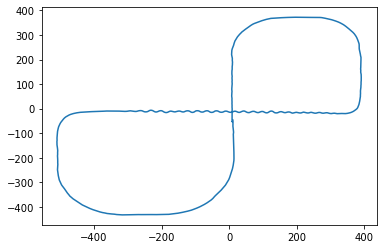

In [6]:
plt.figure()
plt.plot(dataDF['px'], -dataDF['pz'])
plt.show()

We see the veering back and forth that happens when going uphill for some reason, but what we're interested in here is probably the first few seconds of run, so let's look at that.

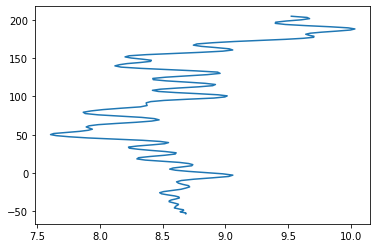

In [7]:
# plotting about the first nine seconds of the run
# does not include the first turn.
plt.figure()
plt.plot(dataDF['px'].iloc[:270], -dataDF['pz'].iloc[:270])
plt.show()

Yup, there it is, weird swerving back and forth at the beginning. Why does it do that? Is that what the waypoints are telling it to do? Let's plot out the waypoints and see...

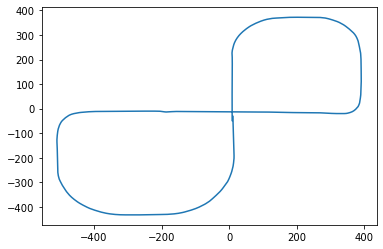

In [8]:
plt.figure()
plt.plot(dataDF['wpx'], -dataDF['wpz'])
plt.show()

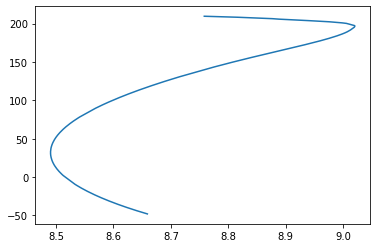

In [9]:
plt.figure()
plt.plot(dataDF['wpx'].iloc[:270], -dataDF['wpz'].iloc[:270])
plt.show()

Uhh... seems like the waypoints themselves make a weird loop for some reason? That's pretty strange...

In [10]:
wpfile = "easy_map_waypoints.txt"

In [11]:
wps = np.loadtxt(wpfile, delimiter=',')

In [12]:
wps

array([[ 8.68398380e+00, -2.25738324e-02,  5.32518921e+01,
        -1.22070072e-04, -9.02891159e+01,  1.56923592e-01],
       [ 8.68398380e+00, -2.25738324e-02,  5.32518921e+01,
        -1.22070072e-04, -9.02891159e+01,  1.56923592e-01],
       [ 8.68398380e+00, -1.96863748e-02,  5.32519112e+01,
        -1.22070058e-04, -9.02891159e+01,  1.53829515e-01],
       ...,
       [ 1.11119318e+01, -2.53252033e-03,  2.98056660e+01,
         1.64224952e-03, -9.06596298e+01, -1.04611173e-01],
       [ 1.11119318e+01, -2.53252033e-03,  2.98056660e+01,
         1.64224952e-03, -9.06596298e+01, -1.04611173e-01],
       [ 1.11119318e+01, -2.53252033e-03,  2.98056660e+01,
         1.64224952e-03, -9.06596298e+01, -1.04611173e-01]])

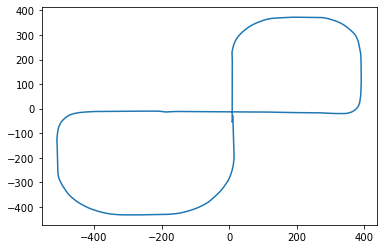

In [13]:
plt.figure()
plt.plot(wps[:, 0], -wps[:, 2])
plt.show()

In [14]:
wps.shape

(9158, 6)

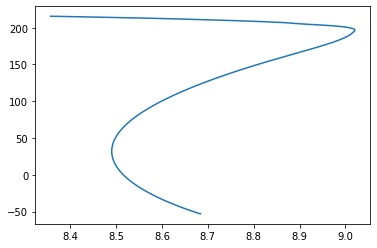

In [15]:
plt.figure()
plt.plot(wps[:900, 0], -wps[:900, 2])
plt.show()

Yeah, seems like the waypoints themselves make a weird loopy loop for some reason...

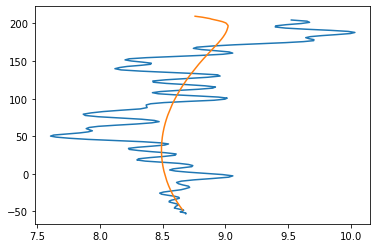

In [16]:
plt.figure()
plt.plot(dataDF['px'].iloc[:270], -dataDF['pz'].iloc[:270])
plt.plot(dataDF['wpx'].iloc[:270], -dataDF['wpz'].iloc[:270])
plt.show()

and the controller is just really really bad at following it for some reason

In [17]:
betterdatapath = "pid_data_5-small_lat_lon_K.csv"
bdataDF = pd.read_csv(betterdatapath, skipinitialspace=True, skiprows=2)

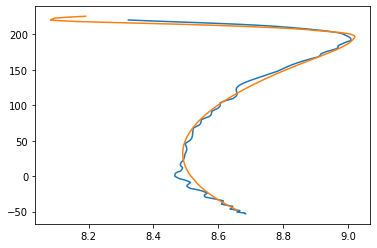

In [18]:
plt.figure()
plt.plot(bdataDF['px'].iloc[:270], -bdataDF['pz'].iloc[:270])
plt.plot(bdataDF['wpx'].iloc[:270], -bdataDF['wpz'].iloc[:270])
plt.show()

Yeah it's just the steering sensitivity ig. Weird how they would just have the waypoints swerve around for a bit instead of just going in a straight line but whatever.

## Day 2 (12/03/2020)

In [19]:
dataDF.shape

(3426, 14)

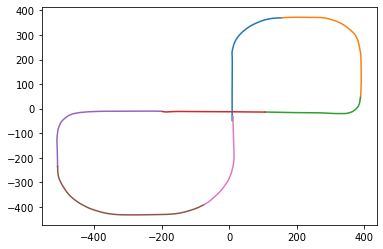

In [20]:
plt.figure()
indBoi = 0
while 500*indBoi < len(dataDF):
    plt.plot(dataDF['wpx'].iloc[indBoi*500:(indBoi+1)*500], -dataDF['wpz'].iloc[indBoi*500:(indBoi+1)*500])
    indBoi += 1
plt.show()

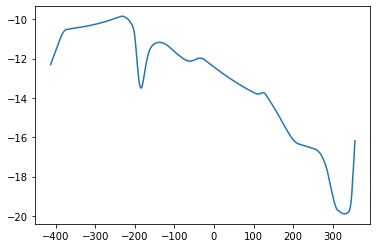

In [35]:
plt.figure()
plt.plot(dataDF['wpx'].iloc[1080:2250], -dataDF['wpz'].iloc[1080:2250])
plt.show()

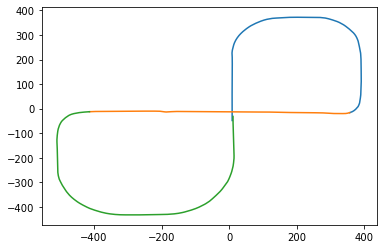

In [36]:
plt.figure()
plt.plot(dataDF['wpx'].iloc[:1080], -dataDF['wpz'].iloc[:1080])
plt.plot(dataDF['wpx'].iloc[1080:2250], -dataDF['wpz'].iloc[1080:2250])
plt.plot(dataDF['wpx'].iloc[2250:], -dataDF['wpz'].iloc[2250:])
plt.show()